In [277]:
import sys
import numpy as np
import scipy

sys.path.insert(0,"../")
from utils import shape_stochastics

In [278]:
source = scipy.io.loadmat("../data/test_data/cat1_50_99.mat")['f']

In [279]:
source[0]

array([[-0.0012771 , -0.0012771 , -0.0012771 , ..., -0.0012771 ,
        -0.0012771 , -0.0012771 ],
       [ 0.0046929 ,  0.00444385,  0.00417636, ...,  0.00532377,
         0.00513337,  0.0046929 ],
       [ 0.01676437,  0.0160726 ,  0.01533174, ...,  0.01853023,
         0.01799456,  0.01676437],
       ...,
       [ 0.0214812 ,  0.02052574,  0.02019822, ...,  0.02340413,
         0.02303971,  0.0214812 ],
       [ 0.00514558,  0.00554049,  0.00589762, ...,  0.00374373,
         0.00424614,  0.00514558],
       [-0.01846699, -0.01846699, -0.01846699, ..., -0.01846699,
        -0.01846699, -0.01846699]])

In [280]:
basis_sph = scipy.io.loadmat("../data/test_data/basis_exact_1forms_deg25_50_99.mat")['Basis_Sph']

In [281]:
basis = scipy.io.loadmat("../data/test_data/basis_exact_1forms_deg25_50_99.mat")['Basis']

In [282]:
basis_sph.shape

(2025, 3, 50, 99)

In [283]:
source.shape

(3, 50, 99)

In [284]:
source

array([[[-0.0012771 , -0.0012771 , -0.0012771 , ..., -0.0012771 ,
         -0.0012771 , -0.0012771 ],
        [ 0.0046929 ,  0.00444385,  0.00417636, ...,  0.00532377,
          0.00513337,  0.0046929 ],
        [ 0.01676437,  0.0160726 ,  0.01533174, ...,  0.01853023,
          0.01799456,  0.01676437],
        ...,
        [ 0.0214812 ,  0.02052574,  0.02019822, ...,  0.02340413,
          0.02303971,  0.0214812 ],
        [ 0.00514558,  0.00554049,  0.00589762, ...,  0.00374373,
          0.00424614,  0.00514558],
        [-0.01846699, -0.01846699, -0.01846699, ..., -0.01846699,
         -0.01846699, -0.01846699]],

       [[ 0.60543677,  0.60543677,  0.60543677, ...,  0.60543677,
          0.60543677,  0.60543677],
        [ 0.60025281,  0.60146997,  0.60271177, ...,  0.59677758,
          0.59790384,  0.60025281],
        [ 0.58391611,  0.58675283,  0.58964349, ...,  0.57579372,
          0.5784303 ,  0.58391611],
        ...,
        [ 0.56689738,  0.5674193 ,  0.56786698, ...,  

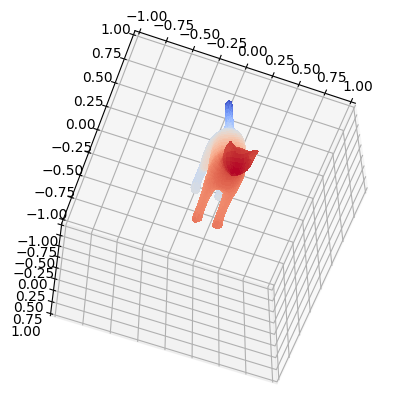

In [285]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X, Y, Z = source[0], source[1], source[2]

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                    linewidth=0, antialiased=False)
ax.set_zlim(-1,1)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.view_init(120, -70)
plt.show()

In [286]:
phi = np.linspace(0, np.pi, 50)
theta = np.linspace(0, 2*np.pi, 99)
phi, theta = np.meshgrid(phi, theta)

In [287]:
from scipy.special import sph_harm

#### sph decomp

In [288]:
def sph_proj(m, l, theta, phi):
    Y = sph_harm(abs(m), l, phi, theta)

    if m < 0:
        Y = np.sqrt(2) * (-1)**m * Y.imag
    elif m > 0:
        Y = np.sqrt(2) * (-1)**m * Y.real

    return Y.real

In [289]:
X_func, Y_func, Z_func = X.T, Y.T, Z.T

In [290]:
def get_coeff(f, m,l,theta,phi):
    coeff = 0
    f
    return coeff

In [291]:
def sph_transform(f, theta, phi, res = 2):
    coeffs = []
    basis = sph_utils.SphHarmBasis(n_coeffs = res**2)
    basis_sph = basis.sph_harm_basis()
    
    for elt in basis_sph:
        coeff = 0
        for j in range(phi.shape[1]):
            for i in range(theta.shape[0]):
                coeff += f[i][j] * elt(theta, phi)[i][j]
                
        coeffs.append(coeff)
    return coeffs

In [232]:
sph_transform(X_func, theta, phi, res = 3)

[0.8873629269867707,
 1.5311518328465081,
 129.76016640796368,
 6.525429973314742,
 3.337864149574975,
 93.15831974885103,
 0.0003387745627717459,
 0.2896007517126997,
 -2.053293528167469]

In [296]:
from utils import sph_utils


def sph_harm_reconstruct(theta, phi, coeffs, res = 5):
    """Reconstruct a function from basis and corresponding coefficients"""

    basis = sph_utils.SphHarmBasis(n_coeffs = res**2)
    
    basis_sph = basis.sph_harm_basis()
    
    return lambda theta, phi : np.dot(coeffs, [f(theta, phi) for f in basis_sph])

In [293]:
X_coeffs = sph_transform(X_func, theta, phi, res = 5)
Y_coeffs = sph_transform(Y_func, theta, phi, res = 5)
Z_coeffs = sph_transform(Z_func, theta, phi, res = 5)

KeyboardInterrupt: 

In [297]:
X_recons = sph_harm_reconstruct(theta, phi, X_coeffs, res=5)
Y_recons = sph_harm_reconstruct(theta, phi, Y_coeffs, res=5)
Z_recons = sph_harm_reconstruct(theta, phi, Z_coeffs, res=5)

In [298]:
basis = sph_utils.SphHarmBasis(n_coeffs = 5**2)
    
basis_sph = basis.sph_harm_basis()

In [299]:
THETA, PHI = shape_stochastics.make_grid(N=32)

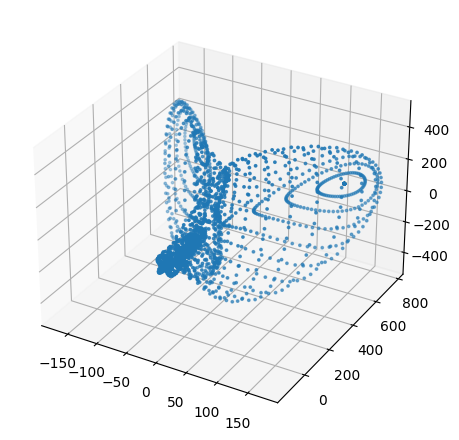

In [302]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(211, projection='3d')
ax1.scatter(X_recons(THETA,PHI), Y_recons(THETA,PHI), Z_recons(THETA,PHI), s = 3)

In [266]:
for i in X_coeffs:
    weig = []
    weig.append(np.multiply(i, np.array([f(theta,phi) for f in basis_sph])))

In [269]:
weig[0].shape

(25, 99, 50)

In [ ]:
(x_mesh, y_mesh, z_mesh) = source[0,:,:], source[1,:,:], source[2,:,:]

# Take a look at your original mesh
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(211, projection='3d')
ax1.scatter(x_mesh, y_mesh, z_mesh, s = 5)
#ax1.view_init(20, 30, 'z')

#ax2 = fig.add_subplot(212, projection='3d')
#ax2.plot_trisurf(x_mesh, y_mesh, triangles=new_mesh_F , Z=z_mesh)
#ax2.view_init(20, 30, 'z')

plt.tight_layout()
plt.show()